1. States the question you want to ask, and formulates the Null and Alternative hypothesis (remember the confidence level!) in words and as a formula. You will not test the hypothesis yet! please do not do it even as extra credit (others will do your hypothesis)

# IDEA:
## Young people are more likely to bike than others.

# Question:
## Are young people (under 40) are more likely to choose biking for commuting than others?

# NULL HYPOTHESIS:
## The proportion of bikers who are under 40 years old is _the same_ or _lower_  than the proportion of bikers who are over 40 years old.
# _$H_0$_ : $\frac{Under { 40}}{TotalBikers} <= \frac{Over  { 40}}{Total Bikers}$

# Alternative HYPOTHESIS:
## The proportion of bikers who are under 40 years old is _higher_ than the proportion of bikers who are over 40 years old.


# _$H_1$_ : $\frac{Under { 40}}{TotalBikers} > \frac{Over  { 40}}{Total Bikers}$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%


In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME") 
    puidata =os.getenv("PUIDATA")
#print(os.getenv("PUIDATA"))   
#if os.getenv ('PUI2018') is None:
#    print ("Must set env variable PUI2018")
#if os.getenv ('PUIDATA') is None:
 #   print ("Must set env variable PUI2018")
%pylab inline
import os
import json
#s = json.load( open(os.getenv('PUI2018') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    #os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
    #os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
   # os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

datestring = '201402'
getCitiBikeCSV(datestring)

file in place, you can continue
file in place, you can continue


In [3]:
#Display the top few rows of the DF in your notebook. This table must be rendered
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1,2014-02-01 00:00:00
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2,2014-02-01 00:00:03
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2,2014-02-01 00:00:09
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1,2014-02-01 00:00:32
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1,2014-02-01 00:00:41


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

Plot your data distributions. The data left at this point should be the data that you think will be useful to answer your question. Drop all other columns/rows.

In [6]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       ], axis=1, inplace=True)

In [63]:
#change birth year to int and reduct the one with value'\n'
df.head(10)
df_1= df.loc[df['birth year'] != '\N' ]
df_1['birth year']=pd.to_numeric(df_1['birth year'])


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


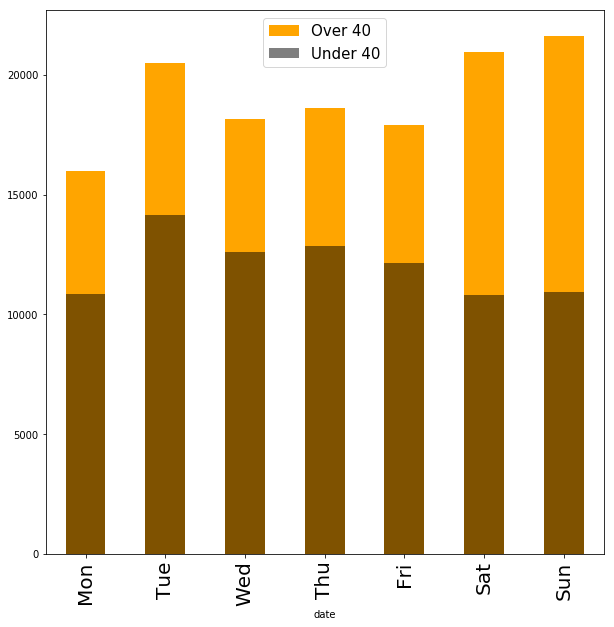

In [89]:
fig = pl.figure(figsize(10,10))


((df_1['date'][df_1['birth year'] >=1974].groupby([df['date'].dt.weekday]).count())).plot(kind="bar", 
                                                                                         color='orange', 
                                                                                          label='Over 40')
                                                                                          
ax = ((df_1['date'][df_1['birth year'] <1974].groupby([df['date'].dt.weekday]).count())) .plot(kind="bar", 
                                                                                              color='black', 
                                                                                              alpha=0.5,
                                                                                              label='Under 40')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend(fontsize=15)                                                                                      

## Figure 1: Distribution of Citibike bikers under and over 40 years old in February 2014, absolute counts

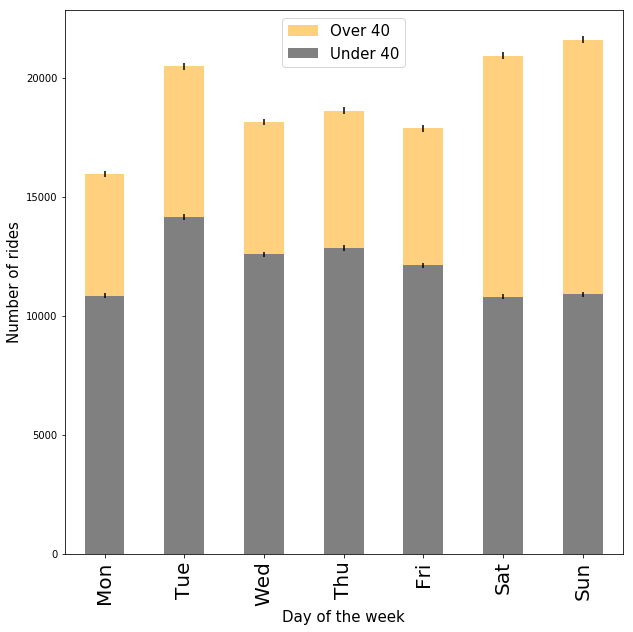

In [98]:
fig=pl.figure(figsize(10,10))

counts_o = df_1.date[df_1['birth year'] >= 1974].groupby([df.date.dt.weekday]).count()
norm_o = 1
error_o=np.sqrt(counts_o)
ax= ((counts_o) / norm_o).plot(kind="bar", alpha=0.5, yerr=[((error_o) / norm_o, (error_o) / norm_o)], 
                           color='orange', label='Over 40')
counts_u = df_1.date[df_1['birth year'] <1974].groupby([df_1.date.dt.weekday]).count()
norm_u = 1
error_u = np.sqrt(counts_u)
((counts_u) / norm_u).plot(kind="bar",color='gray',  yerr=[
            ((error_u) / norm_u, (error_u) / norm_u)], label='Under 40')


ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides",fontsize=15)
ax.set_xlabel ("Day of the week",fontsize=15)
pl.legend(fontsize=15)



## Figure 2: Distribution of Citibike bikers under and over 40 years old in February 2014, absolute counts, with statistical errors sqrt(N)

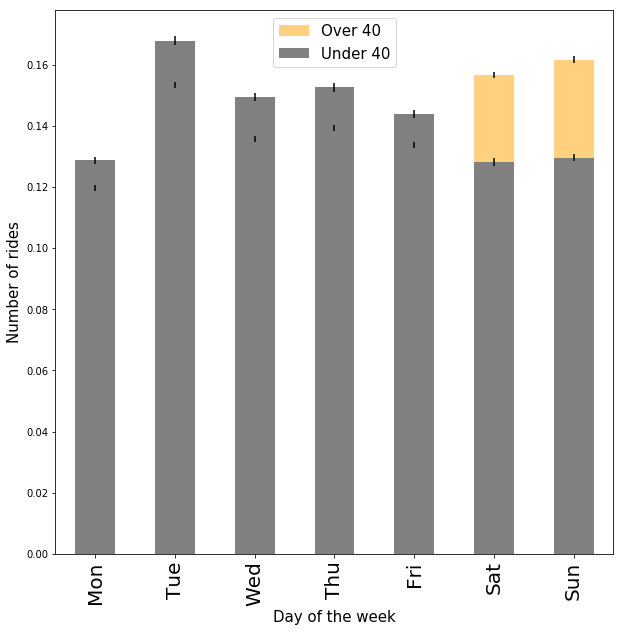

In [106]:
fig=pl.figure(figsize(10,10))


counts_o = df_1.date[df_1['birth year'] >= 1974].groupby([df.date.dt.weekday]).count()
norm_o = counts_o.sum()
error_o=np.sqrt(counts_o)
ax= ((counts_o) / norm_o).plot(kind="bar", alpha=0.5, yerr=[((error_o) / norm_o, (error_o) / norm_o)], 
                           color='orange', label='Over 40')
counts_u = df_1.date[df_1['birth year'] <1974].groupby([df_1.date.dt.weekday]).count()
norm_u = counts_u.sum()
error_u = np.sqrt(counts_u)
((counts_u) / norm_u).plot(kind="bar",color='gray',  yerr=[
            ((error_u) / norm_u, (error_u) / norm_u)], label='Under 40')


ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides",fontsize=15)
ax.set_xlabel ("Day of the week",fontsize=15)
pl.legend(fontsize=15)

 # Figure 2: Distribution of Citibike bikers under and over 40 years old in February 2014, normalized.